<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset link: https://drive.google.com/file/d/1Jm4rFVh-sH9yDkx3v_BL2EruHdnmenGk/view?usp=drive_link

# # ✍ Problem:
**predicting whether a customer will churn (leave the service) or not based on their characteristics and service usage patterns.**


**customerID:**	Unique ID assigned to each customer (used for identification only, not useful for modeling).

**gender:** Gender of the customer – Male or Female. May or may not influence churn.

**SeniorCitizen:**	Whether the customer is a senior citizen (0 = No, 1 = Yes). Binary numerical feature.

**Partner:**	Whether the customer has a partner (Yes/No).

**Dependents:**	Whether the customer has dependents (children, family) (Yes/No).

**tenure:**	Number of months the customer has stayed with the company. Longer tenure may mean higher loyalty.

**PhoneService:**	Whether the customer has a phone service (Yes/No).

**MultipleLines:**	Whether the customer has multiple phone lines – values like Yes / No / No phone service.

**InternetService:**	Type of internet service – options: DSL, Fiber optic, No.

**OnlineSecurity:**	Whether the customer has online security add-on – Yes / No / No internet service.

**OnlineBackup:**	Whether the customer has online backup service – Yes / No / No internet service.

**DeviceProtection:**	Whether the customer has device protection – Yes / No / No internet service.

**TechSupport:**	Whether the customer has technical support service – Yes / No / No internet service.

**StreamingTV:**	Whether the customer streams TV – Yes / No / No internet service.

**StreamingMovies:**	Whether the customer streams movies – Yes / No / No internet service.

**Contract:**	Type of contract: Month-to-month, One year, or Two year. This is an important feature—monthly contracts often churn more.

**PaperlessBilling:**	Whether the customer uses paperless billing – Yes or No.

**PaymentMethod:**	How the customer pays: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic).

**MonthlyCharges:**	The amount charged to the customer monthly. Higher charges may influence churn.

**TotalCharges:**	The total amount charged to the customer over their tenure.

**Churn (Target):**	Whether the customer churned (Yes = left, No = stayed). This is what you're predicting using logistic regression.


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/customer_churn_.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#EDA
#1. null

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#2. duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#3. outliers

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

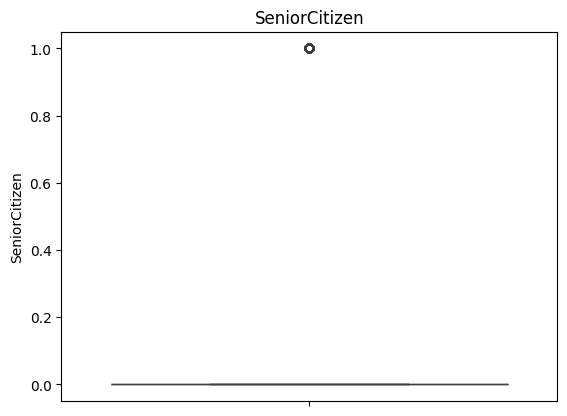

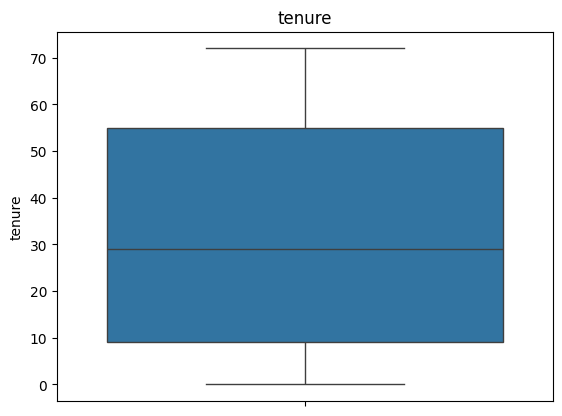

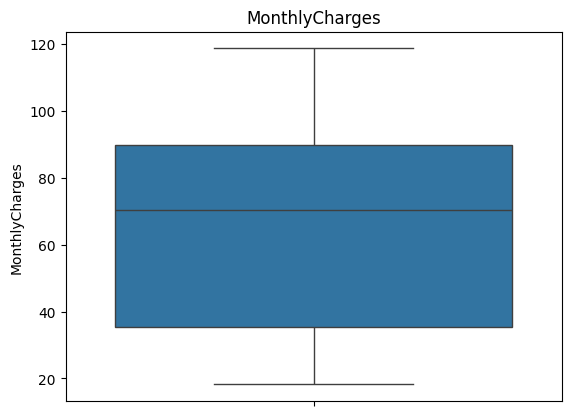

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

#if no box is present in the boxplot = no range of values available(majority values are extremes/outliers)
#so dropping outliers from these columns might drop the whole column itself

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#convert total charges from object to numerical
#whenever we face an unconvertable value, we replace it with null

df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum().sum()

np.int64(11)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
#dropping CustomerID since its not relevant according to the problem statement

df.drop(['customerID'],axis=1,inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#4. Label Encoding
#Label Encoding converts the categories(of object column) into numeric values(where the numerical values are just a representation of tha category)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#create an instance
LE=LabelEncoder()

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col]=LE.fit_transform(df[col])

#fit: converts the category into number alphabetically
#transform: transform the whole column data according to the number given

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
#Model Building
#1. splitting the data into x and y

In [ ]:
x=df.iloc[:,:-1] #feature/independent: all rows, all columns except last
y=df['Churn'] #target/dependent

In [ ]:
#VIF : Variance Inflation Factor, calculates the multicollinearity(extent of relationship) for a column wrt the whole data
# Acceptable VIF for a column is under 5.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df=pd.DataFrame()

In [ ]:
#storing all the feature column names in the "Features" column
vif_df['Features']=x.columns
vif_df

,Features
0,gender
1,SeniorCitizen
2,Partner
3,Dependents
4,tenure
5,PhoneService
6,MultipleLines
7,InternetService
8,OnlineSecurity
9,OnlineBackup


In [ ]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
#for i in range(len(x.columns)) : iterating through each column in x
#variance_inflation_factor(x.values,i) : calculates VIF value for the current column wrt to the rest of the columns

vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


In [ ]:
x.drop('MonthlyCharges', axis=1, inplace=True)

#DRAWBACK
#this column is important so to overcome dropping, we use dimension reduction techniques like PCA and LDA

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,gender,1.936952
1,SeniorCitizen,1.343210
2,Partner,2.814039
3,Dependents,1.957317
4,tenure,13.942277
5,PhoneService,8.202506
6,MultipleLines,2.511962
7,InternetService,3.646896
8,OnlineSecurity,2.247428
9,OnlineBackup,2.454485


In [ ]:
x.drop('tenure', axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,gender,1.919674
1,SeniorCitizen,1.341260
2,Partner,2.749816
3,Dependents,1.955831
4,PhoneService,8.200629
5,MultipleLines,2.499564
6,InternetService,3.491818
7,OnlineSecurity,2.228559
8,OnlineBackup,2.441964
9,DeviceProtection,2.617616


In [ ]:
x.drop('PhoneService', axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [ ]:
vif_df

,Features,Multicollinearity
0,gender,1.864278
1,SeniorCitizen,1.336778
2,Partner,2.739901
3,Dependents,1.949167
4,MultipleLines,2.492203
5,InternetService,2.529810
6,OnlineSecurity,2.196135
7,OnlineBackup,2.437734
8,DeviceProtection,2.616390
9,TechSupport,2.357595


In [ ]:
#2. splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [ ]:
x_train #Images of dogs and humans

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
2964,1,0,1,0,2,0,2,0,0,2,0,0,1,1,2,1346.90
5113,0,0,1,1,2,1,2,2,2,2,2,2,2,0,1,8166.80
5363,1,0,1,1,2,2,1,1,1,1,1,1,2,0,3,1715.15
5074,0,0,0,1,0,2,1,1,1,1,1,1,1,0,1,921.30
156,0,0,0,0,2,1,0,0,0,0,2,0,0,1,0,1821.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,1,0,0,0,0,2,1,1,1,1,1,1,0,0,3,18.90
3269,1,0,0,0,2,2,1,1,1,1,1,1,1,0,1,1600.95
1658,1,0,1,1,2,1,2,0,2,0,2,2,0,0,1,5341.80
2612,0,0,1,1,2,0,0,2,0,2,2,2,0,0,1,1137.05


In [ ]:
x_test #Images of dogs and humans(FOR TESTING)

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
5561,1,0,0,0,0,2,1,1,1,1,1,1,0,0,2,20.65
5814,1,0,0,0,0,2,1,1,1,1,1,1,0,1,1,330.25
2645,0,0,0,0,0,2,1,1,1,1,1,1,0,0,1,19.80
3983,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2,24.25
6438,1,1,0,0,2,1,0,0,0,0,0,0,0,1,2,74.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,0,0,1,1,2,1,2,0,2,0,0,0,1,0,0,5848.60
5702,1,1,1,1,2,1,2,2,0,0,2,2,0,1,1,7548.10
1662,1,0,0,0,0,1,0,0,0,0,0,0,0,1,2,324.60
2766,0,0,1,0,2,1,2,2,2,2,2,2,1,1,2,7396.15


In [ ]:
y_train #ANSWER/label for dog and human images

,Churn
2964,0
5113,0
5363,0
5074,0
156,0
...,...
4939,0
3269,0
1658,1
2612,0


In [ ]:
y_test

,Churn
5561,0
5814,0
2645,0
3983,1
6438,1
...,...
2757,0
5702,1
1662,1
2766,0


In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import *

accuracy_score(y_test,y_pred)*100

78.3226723525231